<a href="https://colab.research.google.com/github/JoeJoe1313/Time-Series-Course/blob/master/lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install and load packages 

In [1]:
install.packages('TSA')
install.packages('tseries')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(TSA)
library(tseries)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### Load and plot data 

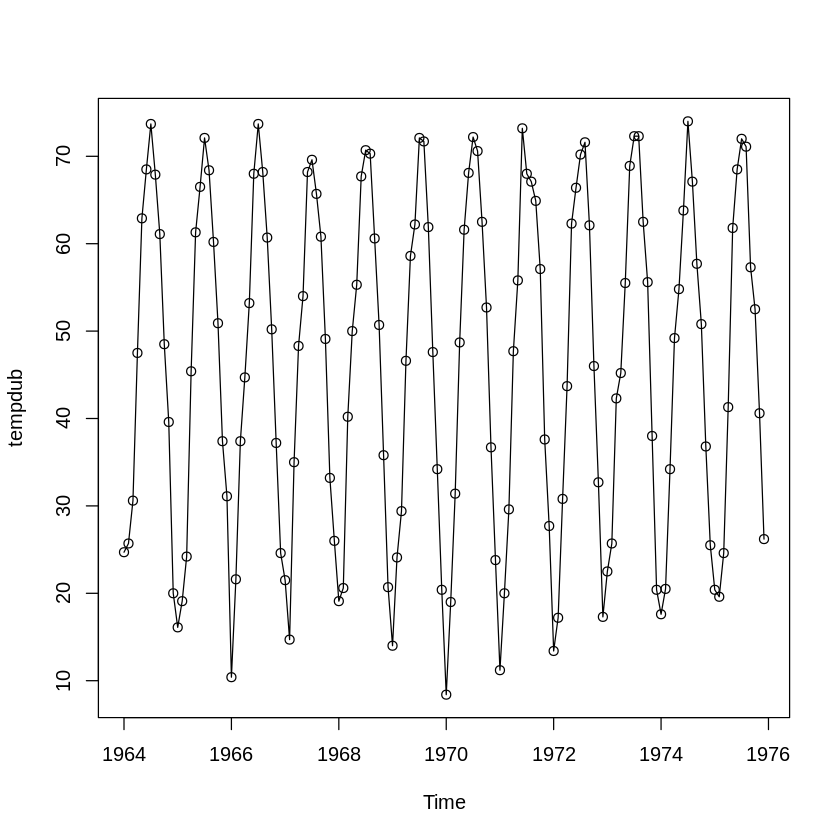

In [3]:
data(tempdub)
plot(tempdub, type='o')

### Plot the ACF 

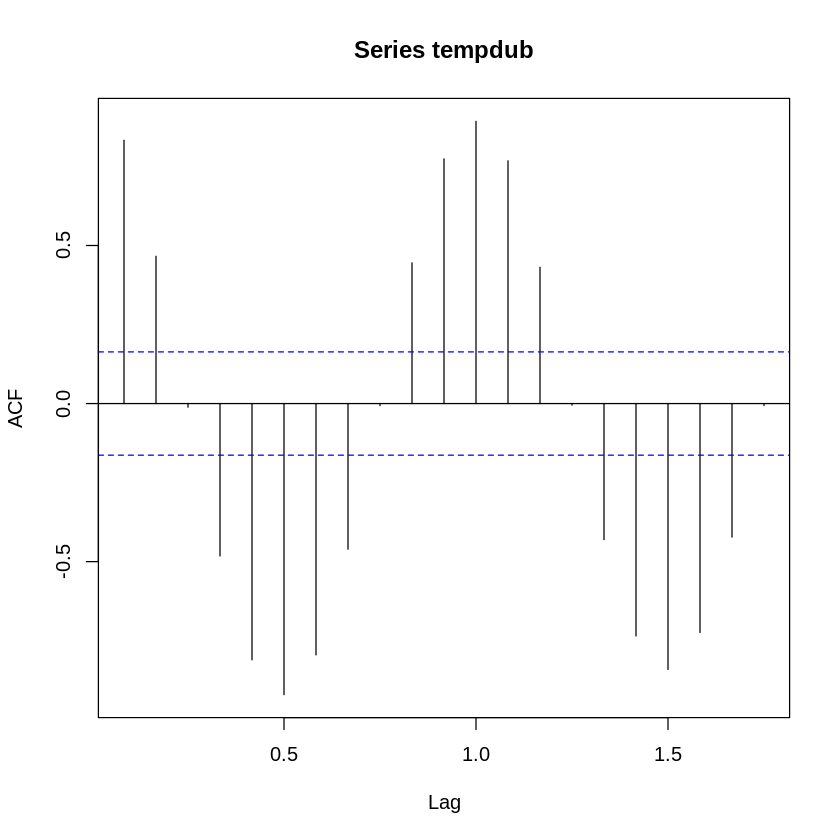

In [4]:
acf(tempdub)

* не чертае lag 0, защото той винаги е 1 
* доверителните интервали идват от Бартлет 
* всеки един стълб е реализация на нормално разпределена случайна величина 
* нямаме основание да считаме, че е бял шум, защото само няколко стълба влизат в доверителния интервал

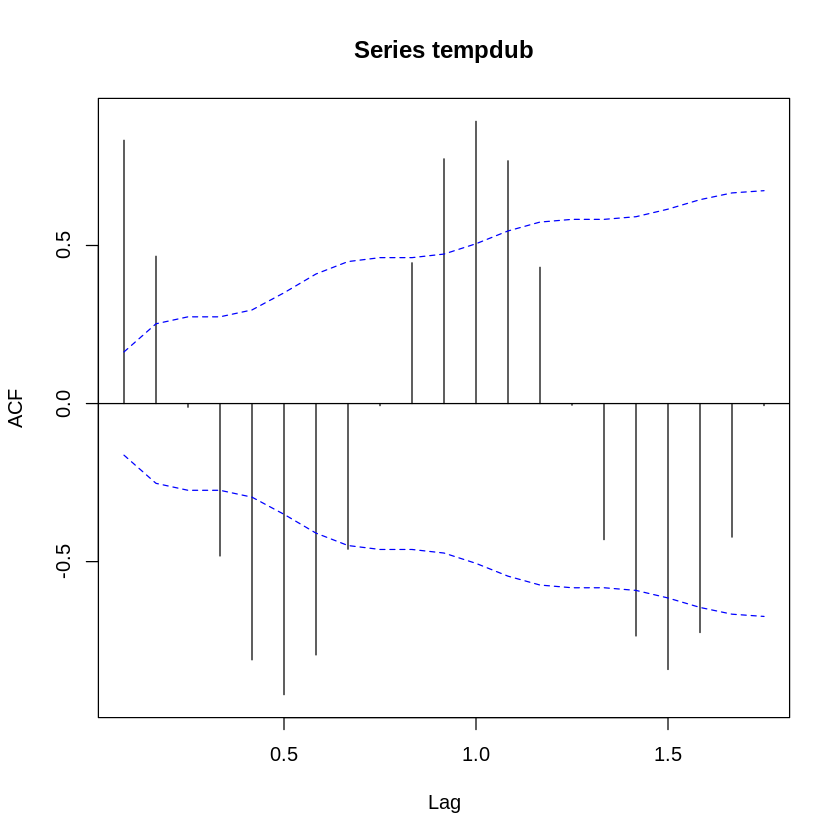

In [5]:
acf(tempdub, ci.type='ma') 

* по-добър вид доверителни интервали 
* с времето прогнозите стават по-неточни и съответно доверителният интервал се разширява с времето 

In [6]:
x = c(1, 4, 3, 2, 6, 8, 2) # някакъв вектор 
y = ts(x, start=c(2020,10), frequency = 12) # от 10-ти месец 
# y = ts(x, start=c(2020,1), frequency = 1) 
y 

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,,,,,,,1,4,3
2021,2,6,8,2,,,,,,,,


In [7]:
# help(ts)

* The function ts is used to create time-series objects
* ts(data = NA, start = 1, end = numeric(), frequency = 1,
   deltat = 1, ts.eps = getOption("ts.eps"), class = , names = )
* data $\rightarrow$ a vector or matrix of the observed time-series values. A data frame will be coerced to a numeric matrix via data.matrix (See also ‘Details’.)
* start $\rightarrow$ start	the time of the first observation. Either a single number or a vector of two integers, which specify a natural time unit and a (1-based) number of samples into the time unit. See the examples for the use of the second form
* frequency	$\rightarrow$ the number of observations per unit of time

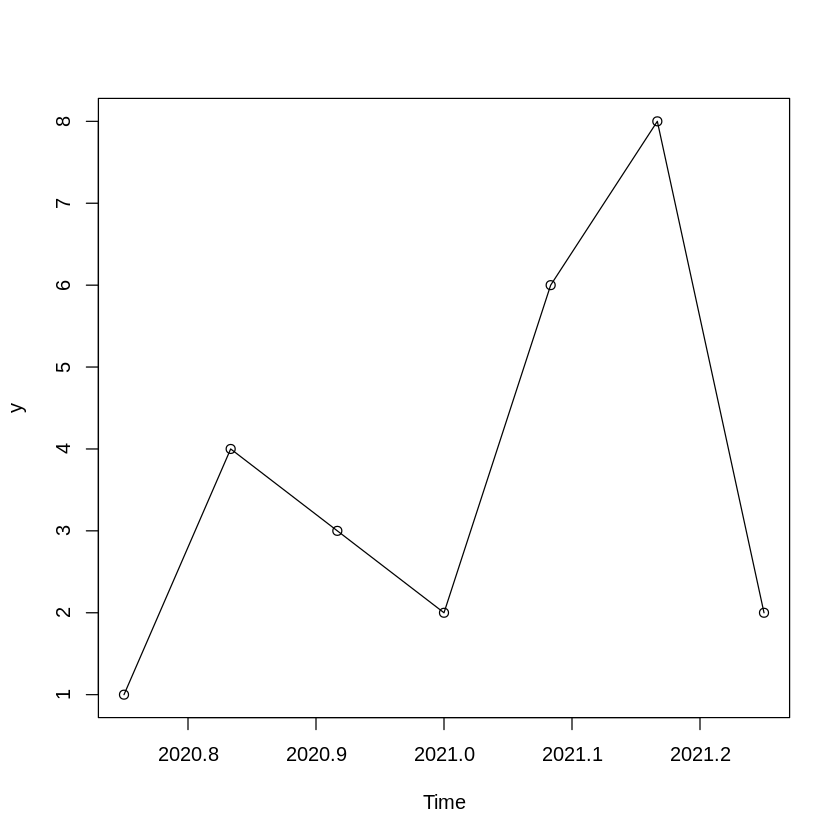

In [8]:
plot(y, type='o')

In [9]:
y = ts(x, start = c(2020, 1), frequency = 4)
y

,Qtr1,Qtr2,Qtr3,Qtr4
2020,1,4,3,2
2021,6,8,2,


In [10]:
tempdub

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1964,24.7,25.7,30.6,47.5,62.9,68.5,73.7,67.9,61.1,48.5,39.6,20.0
1965,16.1,19.1,24.2,45.4,61.3,66.5,72.1,68.4,60.2,50.9,37.4,31.1
1966,10.4,21.6,37.4,44.7,53.2,68.0,73.7,68.2,60.7,50.2,37.2,24.6
1967,21.5,14.7,35.0,48.3,54.0,68.2,69.6,65.7,60.8,49.1,33.2,26.0
1968,19.1,20.6,40.2,50.0,55.3,67.7,70.7,70.3,60.6,50.7,35.8,20.7
1969,14.0,24.1,29.4,46.6,58.6,62.2,72.1,71.7,61.9,47.6,34.2,20.4
1970,8.4,19.0,31.4,48.7,61.6,68.1,72.2,70.6,62.5,52.7,36.7,23.8
1971,11.2,20.0,29.6,47.7,55.8,73.2,68.0,67.1,64.9,57.1,37.6,27.7
1972,13.4,17.2,30.8,43.7,62.3,66.4,70.2,71.6,62.1,46.0,32.7,17.3
1973,22.5,25.7,42.3,45.2,55.5,68.9,72.3,72.3,62.5,55.6,38.0,20.4


### Random Walk

In [11]:
x

[1] 1 4 3 2 6 8 2

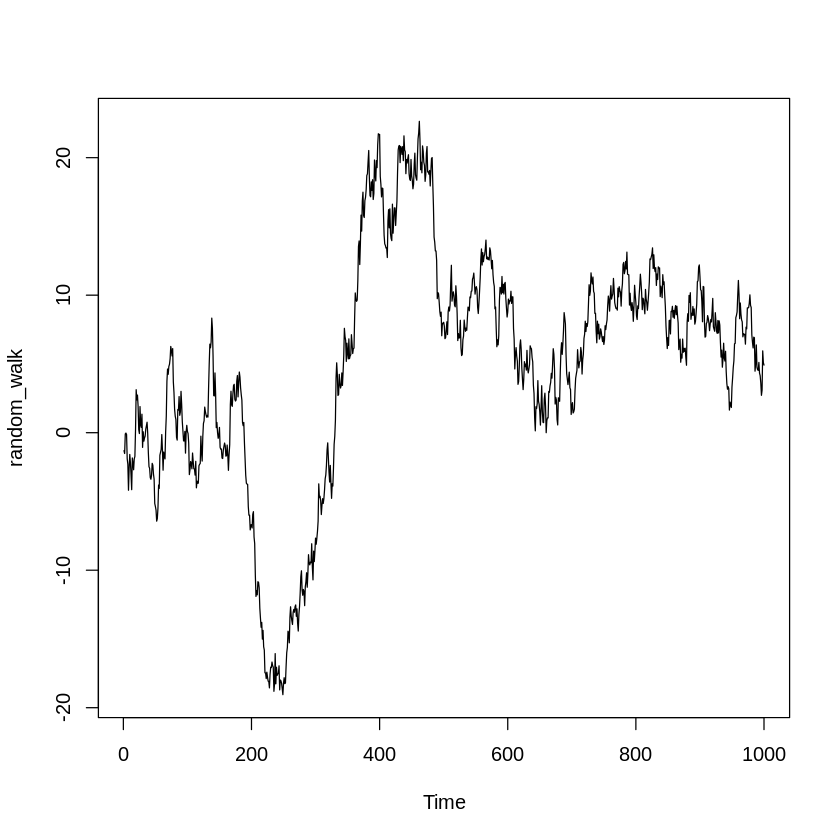

In [12]:
random_walk = ts(cumsum(rnorm(1000)), freq = 1, start = 1)
# 1000 нормално стандартно разпределени величини, сумираме последователно
# първото е първото набл, второто е сумата от първите две, третото от първите три...
plot(random_walk)

### Fitting linear regression

* предикторът е времето 
* $y = a * t + b$ $\rightarrow$ b е intercept
* не трябва да гледаме $R^2$, защото това са зависими данни 

In [13]:
model = lm(random_walk ~ time(random_walk))
summary(model)


Call:
lm(formula = random_walk ~ time(random_walk))

Residuals:
     Min       1Q   Median       3Q      Max 
-20.4333  -3.5688  -0.0032   3.4679  18.3124 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.0628151  0.4907857  -4.203 2.87e-05 ***
time(random_walk)  0.0138359  0.0008494  16.288  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.754 on 998 degrees of freedom
Multiple R-squared:   0.21,	Adjusted R-squared:  0.2092 
F-statistic: 265.3 on 1 and 998 DF,  p-value: < 2.2e-16


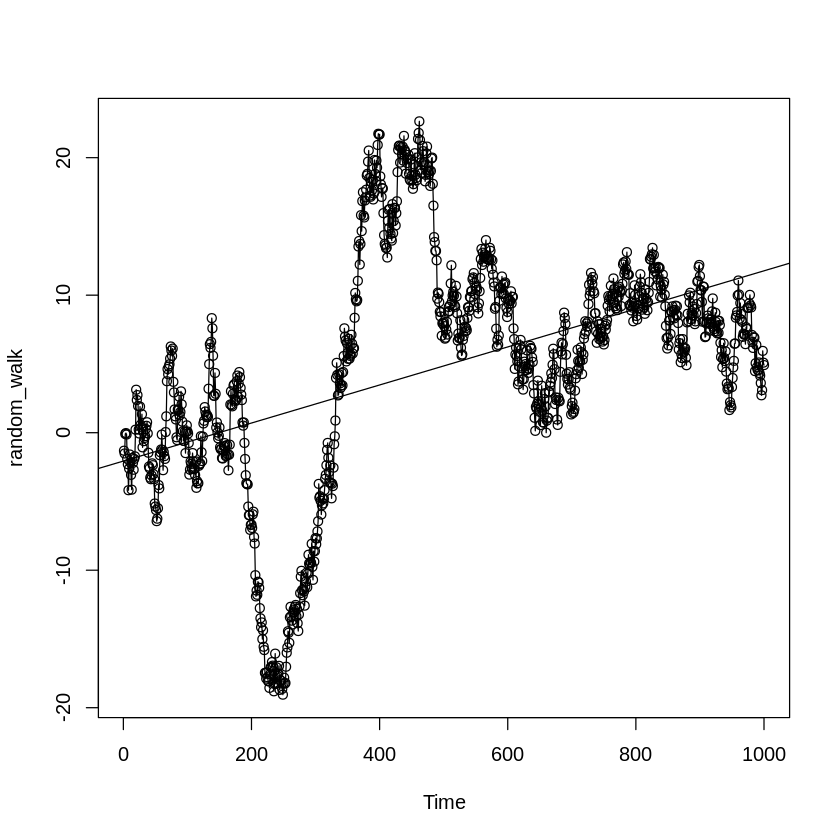

In [14]:
plot(random_walk, type='o')
abline(model)

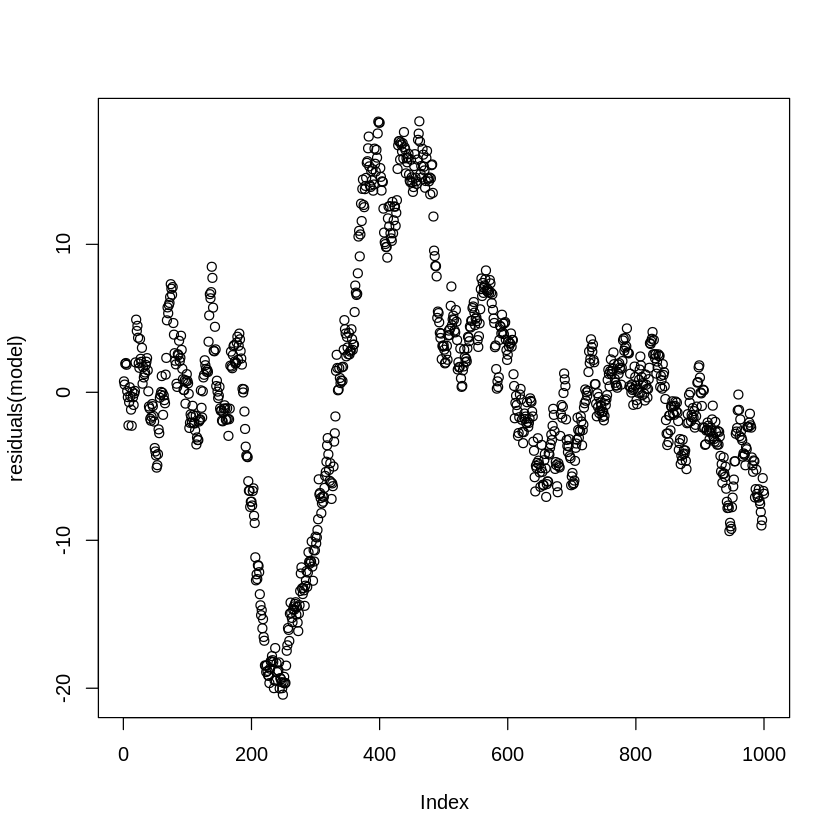

In [15]:
plot(residuals(model))

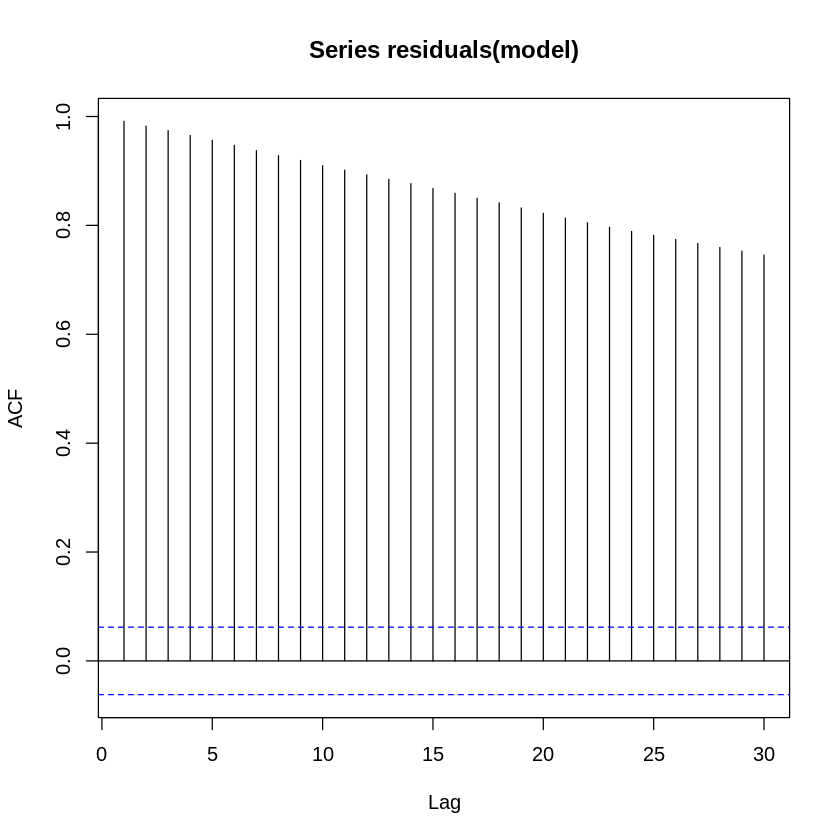

In [16]:
acf(residuals(model))

* излизаме от доверителните интервали $\Rightarrow$ не е бял шум
* много бавно намаляване на кореалциите $\rightarrow$ почти линейно, характерно за времевите редове с тренд 
* трендът е останал въпреки регресията 
* $R^2$ не върши работа, трябва да гледаме корелационната функция $\rightarrow$ веднъж за изходния ред и веднъж за остатъците (като цяло след всяко преобр на времевия ред)

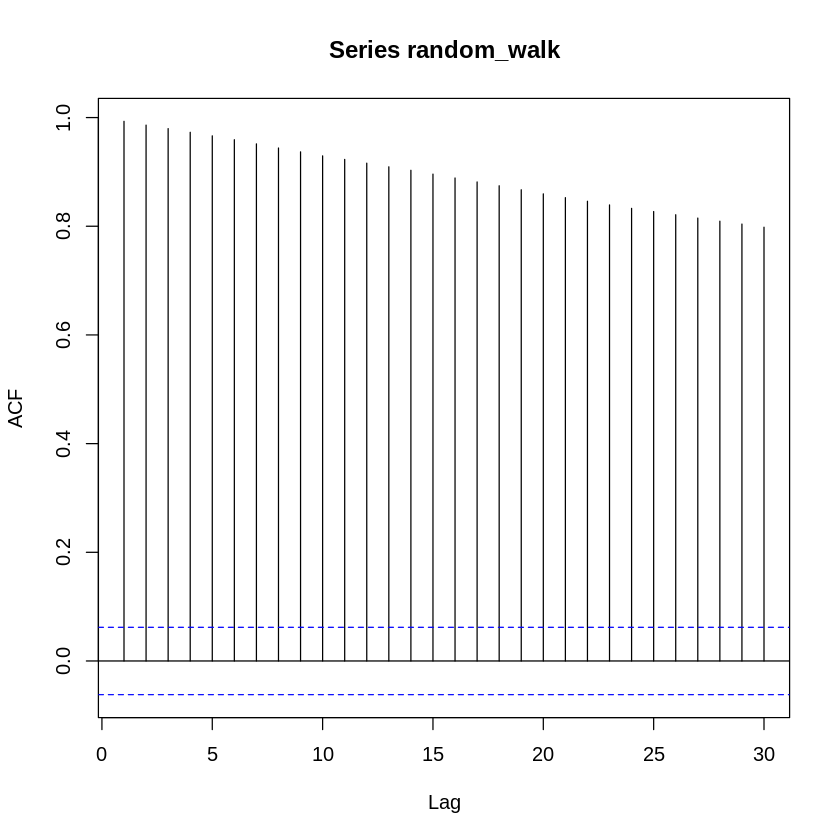

In [17]:
acf(random_walk)

* първоначалното acf почти не се различава от това след регресията 

### Отстраняване на тренда посредством диференчна операция

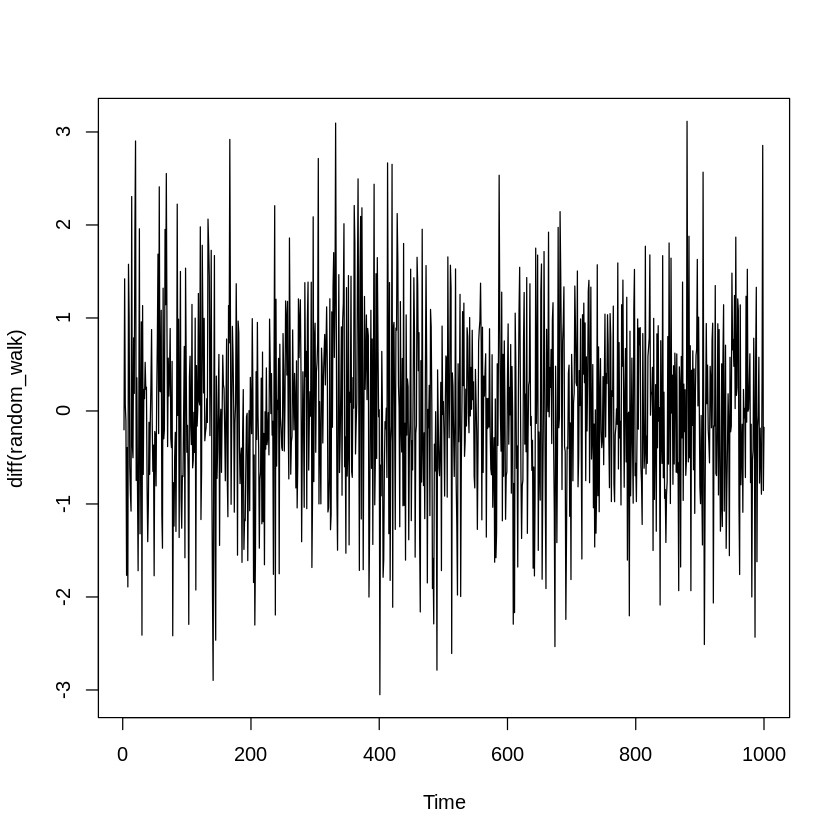

In [18]:
plot(diff(random_walk))

* oт всяка една данна вадим предходната 
* изравнява се редът и става успероден на абсцисата 
* много прилича на бяла шум $\rightarrow$ ще проверим с acf 

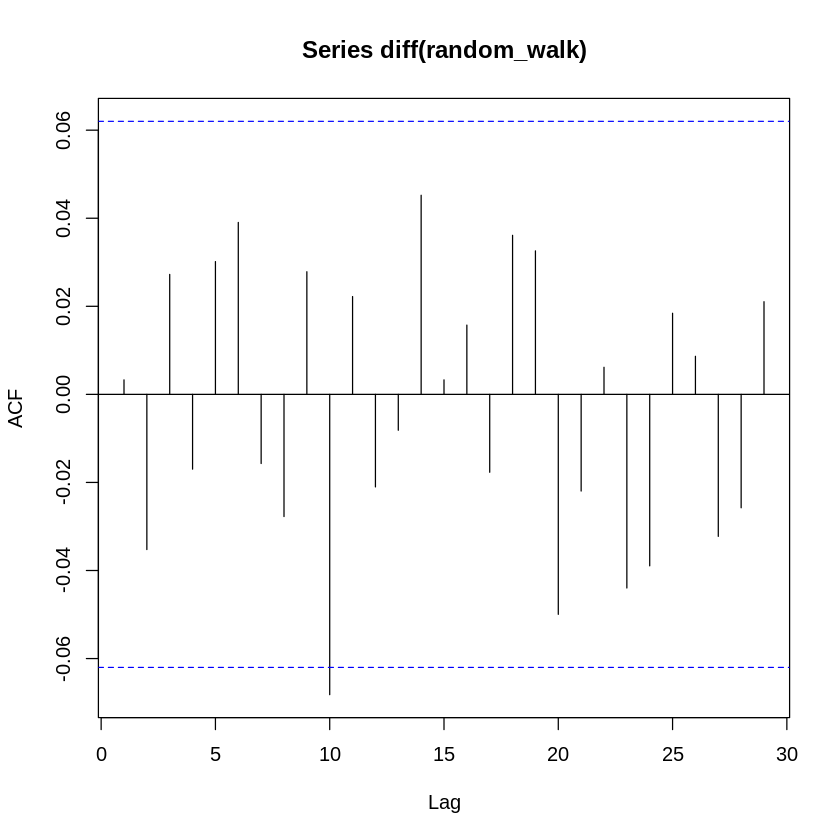

In [19]:
acf(diff(random_walk))

* само един лаг излиза от дов инт $\Rightarrow$ можем да считаме, че имаме бял шум 
* ARIMA(0, 1, 0) $\rightarrow$ след една диференчна операция $\Rightarrow$ ARMA(0, 0)
* доказахме, че е непрогнозируем  